## Pandas

### Table of contents:
* [Import biblioteki](#0)
* [Exercise 121](#1)
* [Exercise 122](#2)
* [Exercise 123](#3)
* [Exercise 124](#4)
* [Exercise 125](#5)
* [Exercise 126](#6)
* [Exercise 127](#7)
* [Exercise 128](#8)
* [Exercise 129](#9)
* [Exercise 130](#10)

### <a name='0'></a> Import of libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
np.__version__

'1.19.2'

The _fetch_financial_data()_ function fetches data on listed companies. It will be used in the following exercises. To download data of a specific company, you must provide the ticker (symbol) of the company.

Some sample company tickers:
* AMZN - Amazon
* GOOGL - Google
* MSFT - Microsoft
* AAPL - Apple
* NKE - Nike
* WMT - Walmart

In [2]:
def fetch_financial_data(company='AMZN'):
    """ This function fetches stock market quotations. """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

### <a name='1'></a> Exercise 121
Using the _fetch_financial_data()_ function, download Google (Alphabet) quotes and assign to the variable _google_. Display object _google_.

In [37]:
google = fetch_financial_data('GOOGL')

### <a name='2'></a> Exercise 122
Display basic information about _google_ object.

In [4]:
display(google.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2021-06-03 to 2016-06-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


None

Display basic statistics for _google_.

In [5]:
display(google.describe())

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1213.466245,1225.411552,1201.834205,1214.099998,1.736113e+06
std,363.102383,368.024573,359.081009,363.645312,8.267963e+05
min,682.490000,683.325000,672.660000,681.140000,4.656380e+05
25%,974.315000,979.677500,968.440000,973.825000,1.212256e+06
50%,1133.470000,1146.190000,1123.360000,1135.470000,1.535082e+06
75%,1354.227500,1366.385000,1344.890000,1353.957500,1.982887e+06
max,2392.495400,2431.380000,2373.850000,2392.760000,6.658855e+06


Note the precision of individual statistics.
Try setting the appropriate _pandas_ library options to display data with two decimal places.

__Tip:__ 
https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [6]:
pd.set_option("precision", 2)
google.describe()

,Open,High,Low,Close,Volume
count,1258.00,1258.00,1258.00,1258.00,1.26e+03
mean,1213.47,1225.41,1201.83,1214.10,1.74e+06
std,363.10,368.02,359.08,363.65,8.27e+05
min,682.49,683.33,672.66,681.14,4.66e+05
25%,974.32,979.68,968.44,973.83,1.21e+06
50%,1133.47,1146.19,1123.36,1135.47,1.54e+06
75%,1354.23,1366.38,1344.89,1353.96,1.98e+06
max,2392.50,2431.38,2373.85,2392.76,6.66e+06


__Additionally:__
The following setting will also suppress mathematical notation (see column _Volume_).

In [7]:
pd.options.display.float_format = '{:.2f}'.format
google.describe()

,Open,High,Low,Close,Volume
count,1258.00,1258.00,1258.00,1258.00,1258.00
mean,1213.47,1225.41,1201.83,1214.10,1736113.33
std,363.10,368.02,359.08,363.65,826796.27
min,682.49,683.33,672.66,681.14,465638.00
25%,974.32,979.68,968.44,973.83,1212255.50
50%,1133.47,1146.19,1123.36,1135.47,1535081.50
75%,1354.23,1366.38,1344.89,1353.96,1982887.00
max,2392.50,2431.38,2373.85,2392.76,6658855.00


Build a simple chart for _google_ closing price (_Close_)

<AxesSubplot:xlabel='Date'>

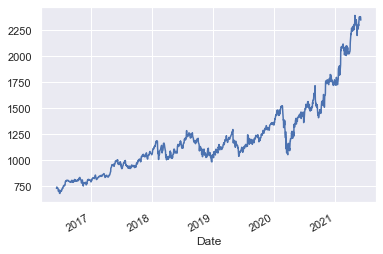

In [8]:
google['Close'].plot()

### <a name='3'></a> Exercise 123
Replace the _Date_ index with a column. Permanently assign changes to the _google_.

In [38]:
google = google.reset_index()

Assign two new columns to the _google_ object by adding a column with the current month number named _'Month'_ and the year named _'Year'_.

In [39]:
google['Month'] = google['Date'].dt.month
google['Year'] = google['Date'].dt.year
google.head()

,Date,Open,High,Low,Close,Volume,Month,Year
0,2021-06-03,2345.73,2357.01,2329.52,2347.58,934796,6,2021
1,2021-06-02,2389.15,2393.64,2352.36,2370.59,1058146,6,2021
2,2021-06-01,2374.44,2385.71,2354.28,2381.18,1167901,6,2021
3,2021-05-28,2374.42,2376.07,2352.85,2356.85,1074540,5,2021
4,2021-05-27,2389.05,2389.05,2356.26,2362.68,1761201,5,2021


### <a name='4'></a> Exercise 124
Compute the average closing price (_Close_) for a particular year (group data by year - column _Year_ and then calculate the average value).

In [12]:
avg_close_by_year = google.groupby("Year")['Close'].mean()

Present the obtained values on the graph using the _plot()_ method.

<AxesSubplot:xlabel='Year'>

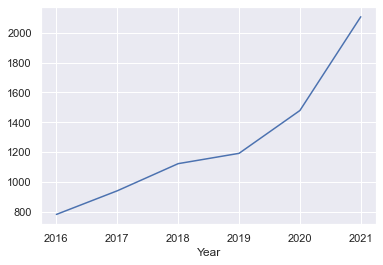

In [13]:
avg_close_by_year.plot()

Compute the average closing price (_Close_) for the month (group data by month - the _Month_ column and then count the average value).

In [14]:
avg_close_by_month = google.groupby("Month")['Close'].mean()

Present the obtained values on the graph using the _plot()_ method.
Note which months may indicate weaker periods on the stock market.

<AxesSubplot:xlabel='Month'>

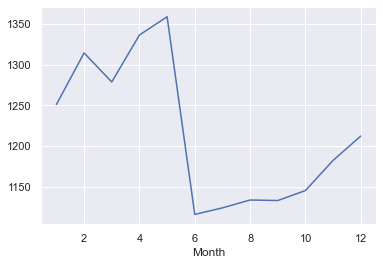

In [15]:
avg_close_by_month.plot()

### <a name='5'></a> Exercise 125
Group data from _google_ at year and month level. Then calculate the average value.


In [17]:
avg_val = google.groupby(["Year", "Month"]).mean()
avg_val

Open    High     Low   Close     Volume
Year Month                                           
2016 6      717.29  721.63  711.18  715.93 1401399.63
     7      739.46  744.27  735.32  741.06 1160384.90
     8      799.29  803.53  795.95  800.22  927411.39
     9      800.32  805.77  796.25  801.61 1112772.29
     10     815.74  819.86  809.65  813.66 1400274.00
...            ...     ...     ...     ...        ...
2021 2     2050.22 2080.60 2031.99 2058.09 1785157.21
     3     2049.47 2073.58 2025.22 2047.67 1645128.39
     4     2269.08 2290.45 2251.98 2272.99 1672377.14
     5     2308.95 2327.03 2288.35 2308.56 1508761.95
     6     2369.77 2378.79 2345.39 2366.45 1053614.33

[61 rows x 5 columns]

### <a name='6'></a> Exercise 126
Find the index for which the _Close_ column has the largest value.


In [18]:
google['Close'].argmax()

24

Extract the row for this index from the google object as a DataFrame. Read the date.

In [21]:
google.iloc[[google['Close'].argmax()]]

,Date,Open,High,Low,Close,Volume,Month,Year
24,2021-04-29,2389.23,2404.16,2373.85,2392.76,2061654,4,2021


### <a name='7'></a> Exercise 127
Extract the columns _Date_, _Open_, _Close_, _Volume_ from the _google_ object.
Don't change the original _google_ object!

In [22]:
df = google[["Date", "Open", "Close"]]

### <a name='8'></a> Exercise 128
Set the index for the _Date_ column back. Display object _google_.

In [40]:
google = google.set_index("Date")

### <a name='9'></a> Exercise 129
Permanently remove the _Year_ and _Month_ columns from the _google_ object. Display object _google_.

In [43]:
google = google.drop(columns=["Year", "Month"])
google

,Open,High,Low,Close,Volume
Date,,,,,
2021-06-03,2345.73,2357.01,2329.52,2347.58,934796
2021-06-02,2389.15,2393.64,2352.36,2370.59,1058146
2021-06-01,2374.44,2385.71,2354.28,2381.18,1167901
2021-05-28,2374.42,2376.07,2352.85,2356.85,1074540
2021-05-27,2389.05,2389.05,2356.26,2362.68,1761201
...,...,...,...,...,...
2016-06-10,735.95,739.64,730.51,733.19,1242152
2016-06-09,737.07,743.93,736.50,742.52,619331
2016-06-08,739.50,743.81,735.76,742.93,1097087


### <a name='10'></a> Exercise 130

Assign the following values to the column names:
* Open -> O
* High -> H
* Low -> L
* Close -> C
* Volume -> V

to object _google_. Siaplay object _google_.

In [ ]:
google = google.